In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = (0.5, ), std = (0.5, ))])
trainset = torchvision.datasets.FashionMNIST(root='D:/Downloads/DecisionTree_RandomForest', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=8, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='D:/Downloads/DecisionTree_RandomForest', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=8, shuffle=False)

+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

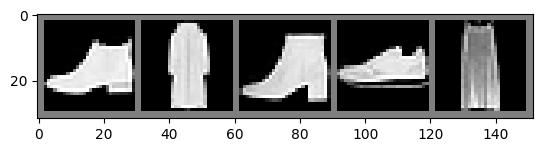

In [ ]:
def imshow(img):
    img = img * 0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()
    
for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:5]))
    break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [5]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_features, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    return model


+ Khởi tạo hàm loss function và phương thức optimizer

In [6]:
n_features = 28 * 28
model = getModel(n_features)
lr = 0.01
optim = SGD(params = model.parameters(), lr = lr)
loss_fn = nn.CrossEntropyLoss()
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

+ Xây dựng hàm đánh giá model

In [7]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [8]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)



        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
     

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 2.3361, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [2/10], Loss: 2.3360, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [3/10], Loss: 2.3359, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [4/10], Loss: 2.3360, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [5/10], Loss: 2.3362, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [6/10], Loss: 2.3361, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [7/10], Loss: 2.3361, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [8/10], Loss: 2.3360, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [9/10], Loss: 2.3361, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%
Epoch [10/10], Loss: 2.3362, Accuracy: 10.96%, Test Loss: 2.3353, Test Accuracy: 10.99%


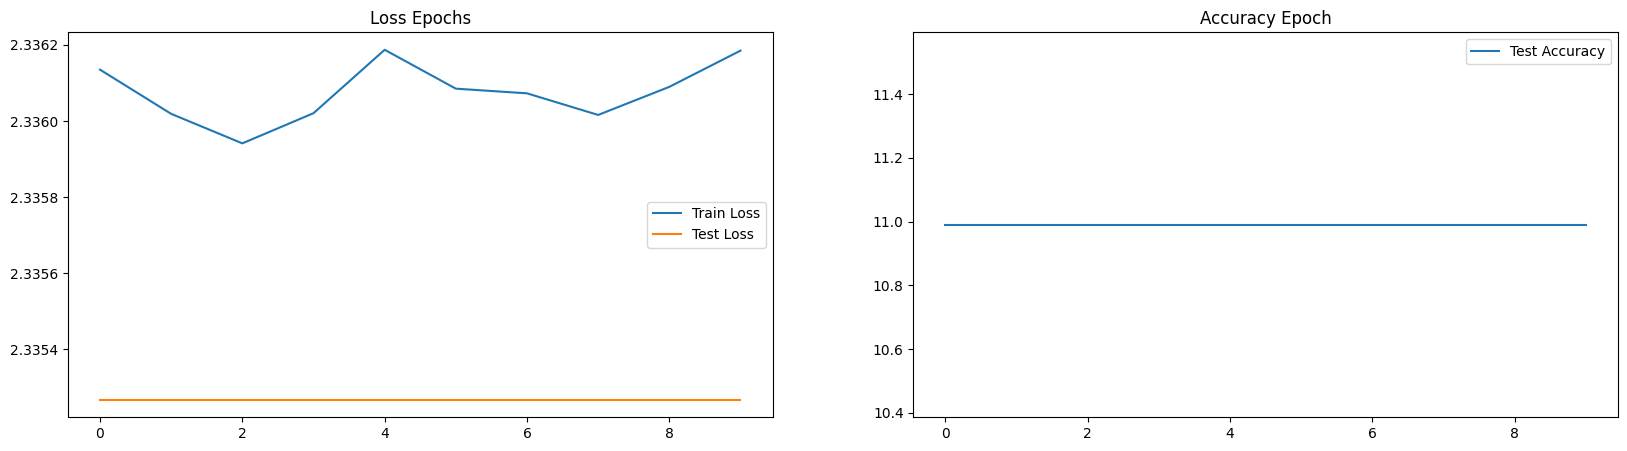

In [9]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [10]:
def zScoreScaling(tensor):
    mean = tensor.mean()
    std = tensor.std()
    return (tensor - mean) / std

In [11]:
def minMaxScaling(tensor):
    min_val = tensor.min()
    max_val = tensor.max()
    return (tensor - min_val) / (max_val - min_val)

In [16]:
class Linear:
    def __init__(self, input_size, output_size):
        # Initialize weights and bias
        self.weight = torch.randn(output_size, input_size)
        self.bias = torch.randn(output_size)
    
    def forward(self, tensor):
        # Perform the linear transformation
        return torch.matmul(self.weight, tensor) + self.bias

In [17]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0], 
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1.4606, -1.0954, -0.7303],
        [-0.3651,  0.0000,  0.3651],
        [ 0.7303,  1.0954,  1.4606]])
tensor([[0.0000, 0.1250, 0.2500],
        [0.3750, 0.5000, 0.6250],
        [0.7500, 0.8750, 1.0000]])


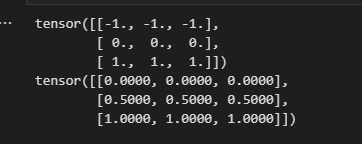

In [18]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

tensor([-3.5894, -4.7504])
Weight = tensor([[-1.9527,  0.9618, -0.5928],
        [-1.1926, -0.5676, -1.0359]])
Bias = tensor([-1.7818,  0.6850])
